In [23]:
import pandas as pd
import numpy as np
import re
import random
from sklearn.impute import KNNImputer

In [12]:
def replace_model_with_top_32(df):
    # Đếm số lần xuất hiện của mỗi giá trị trong cột 'Model'
    model_counts = df['Model'].value_counts()

    # Chọn ra 32 giá trị xuất hiện nhiều nhất
    top_33_models = model_counts.head(33).index.tolist()
    print(top_33_models)
    
    # Loại trừ giá trị '0' khỏi top 32
    top_32_models = [model for model in top_33_models if model != 0][:32]
    
    # Thay thế các giá trị khác bằng giá trị ngẫu nhiên từ 32 giá trị đã chọn
    replacement_values = np.random.choice(top_32_models, size=len(df))
    df['Model'] = np.where(~df['Model'].isin(top_32_models), replacement_values, df['Model'])
    return df


In [25]:
import pandas as pd
import re

def convert_weight(value):
    # Kiểm tra xem giá trị có phải là chuỗi hay không
    if isinstance(value, str):
        # Xóa bỏ các ký tự không cần thiết và khoảng trắng thừa
        value = value.strip().lower().replace('~', '').replace(' ', '').replace(':', '')
        
        # Tìm số và đơn vị (g hoặc kg)
        match = re.search(r"(\d+(\.\d+)?)(kg|g)?", value)
        if match:
            weight = float(match.group(1))
            unit = match.group(3)
            
            # Chuyển đổi kg sang g nếu cần thiết
            if unit == 'kg':
                weight *= 1000
            return int(weight)
        else:
            return None
    elif pd.isna(value):  # Xử lý các giá trị NaN
        return None
    else:  # Trường hợp khác (nếu có giá trị đã là số)
        return int(value)




In [26]:
def read_data_from_csv(filename):
    df = pd.read_csv(filename, sep='\t',encoding='utf-16')
    return df 
df = read_data_from_csv('raw_data_anphatpc.csv')
df['Cân nặng'] = df['Cân nặng'].apply(convert_weight)

In [27]:
df['Cân nặng'].head(20)

0       NaN
1       NaN
2     369.0
3     369.0
4     369.0
5     925.0
6     925.0
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
Name: Cân nặng, dtype: float64

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Dữ liệu mẫu
data = np.array([
    ['red', 'S'],
    ['blue', 'M'],
    ['green', 'L'],
    ['blue', 'S'],
    ['red', 'M']
])

# Mã hóa one-hot
encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(data)

# Áp dụng K-means
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data_encoded)

# Kết quả
print("Centroids:", kmeans.cluster_centers_)
print("Labels:", kmeans.labels_)


Centroids: [[0.  1.  0.  1.  0.  0. ]
 [0.5 0.  0.5 0.  0.5 0.5]]
Labels: [1 1 0 1 1]


In [28]:
import pandas as pd
import numpy as np

def replace_empty_and_contact(df, column):
    """
    Replace empty strings and 'Liên hệ' with random values in a column of a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the column to be processed.
    column (str): The name of the column to process.

    Returns:
    pandas.DataFrame: The DataFrame with replaced values.
    """

    # Replace empty strings and 'Liên hệ' with NaN
    df[column].replace(['', 'Liên hệ'], np.nan, inplace=True)

    # Get unique non-null values
    unique_values = df[column].dropna().unique()

    # Replace NaN values with random values from unique non-null values
    df[column] = df[column].apply(lambda x: np.random.choice(unique_values) if pd.isnull(x) else x)

    return df

# Example usage:
# Create a sample DataFrame
data = {'id': [1, 2, 3, 4, 5],
        'giá': ['100', '200', '', 'Liên hệ', '300']}
df = pd.DataFrame(data)

# Call the function to replace empty strings and 'Liên hệ'
df = replace_empty_and_contact(df, 'giá')

print(df)

   id  giá
0   1  100
1   2  200
2   3  100
3   4  200
4   5  300


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3748\1427077485.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(['', 'Liên hệ'], np.nan, inplace=True)


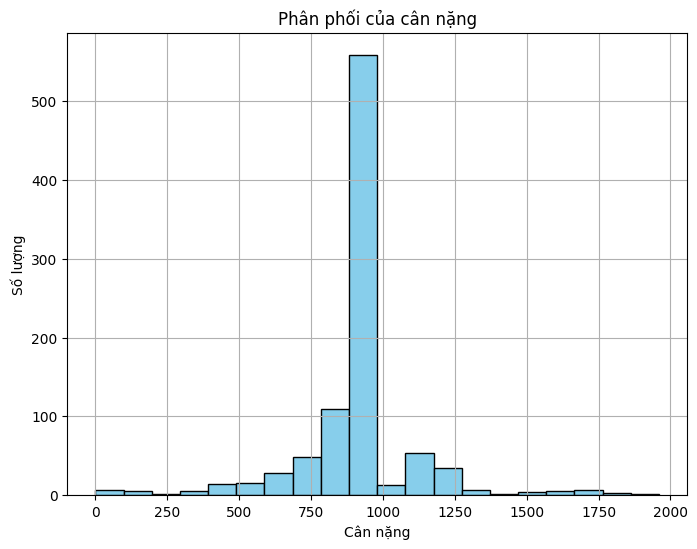

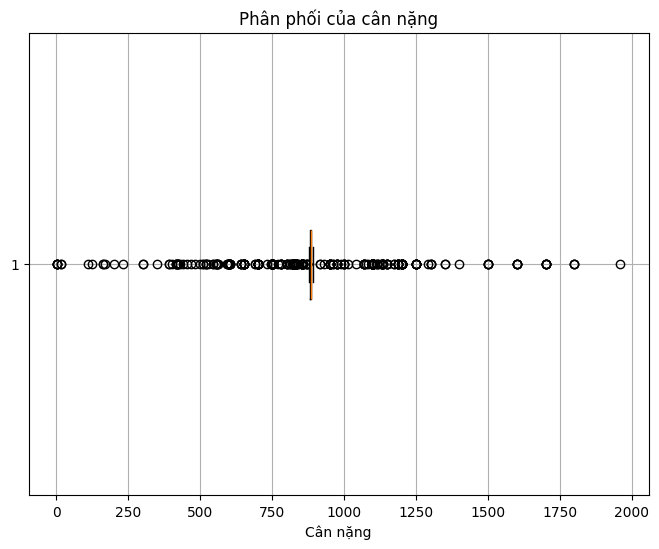

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV vào DataFrame
df = pd.read_csv('clean_data.csv')

# Trực quan hóa phân phối của cột 'Cân nặng' bằng histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Cân nặng'], bins=20, color='skyblue', edgecolor='black')
plt.title('Phân phối của cân nặng')
plt.xlabel('Cân nặng')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()

# Trực quan hóa phân phối của cột 'Cân nặng' bằng boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Cân nặng'], vert=False)
plt.title('Phân phối của cân nặng')
plt.xlabel('Cân nặng')
plt.grid(True)
plt.show()


In [32]:
import pandas as pd

# Đọc các tệp CSV vào các DataFrame
df1 = pd.read_csv('clean_data.csv')
df2 = pd.read_csv('clean_data_anphat.csv')

# Ghép các DataFrame lại với nhau
merged_df = pd.concat([df1, df2])

# Lưu DataFrame ghép lại thành tệp CSV
merged_df.to_csv('Clean_Data.csv', index=False)
